## Import libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib notebook

## Scrape datasets from wikipedia

In [2]:
# Seattle Seahawks
url = 'https://en.wikipedia.org/wiki/List_of_Seattle_Seahawks_seasons'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html, 'html.parser')
table = soup.find_all('table', {"class": "wikitable"})

df_s = pd.read_html(str(table)) 
df_s = pd.DataFrame(df_s[1])
df_s.head()

Season  Team League Conference Division Regular season                   \
    Season  Team League Conference Division         Finish  W   L  T    Pct   
0     1976  1976    NFL        NFC     West            5th  2  12  0  0.143   
1     1977  1977    NFL        AFC     West            4th  5   9  0  0.357   
2  1978[1]  1978    NFL        AFC     West            3rd  9   7  0  0.563   
3     1979  1979    NFL        AFC     West            3rd  9   7  0  0.563   
4     1980  1980    NFL        AFC     West            5th  4  12  0  0.250   

  Postseason results             Awards Head coaches  
  Postseason results             Awards Head coaches  
0                NaN                NaN  Jack Patera  
1                NaN                NaN  Jack Patera  
2                NaN  Jack Patera (COY)  Jack Patera  
3                NaN                NaN  Jack Patera  
4                NaN                NaN  Jack Patera

In [3]:
# Seattle Mariners
url = 'https://en.wikipedia.org/wiki/List_of_Seattle_Mariners_seasons'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html, 'html.parser')
table_m = soup.find_all('table', {"class": "wikitable"})

df_m = pd.read_html(str(table_m)) 
df_m = pd.DataFrame(df_m[2])
df_m.head()

,MLBseason,Teamseason,Level,League,Division,Finish,Wins,Losses,Win%,GB,Post-season,Awards
0,1977,1977,MLB,AL,West,6th,64,98,.395,38,—,—
1,1978,1978,MLB,AL,West,7th,56,104,.350,35,—,—
2,1979,1979,MLB,AL,West,6th,67,95,.414,21,—,—
3,1980,1980[a],MLB,AL,West,7th,59,103,.364,38,—,—
4,1981[b],1981[a],MLB,AL,West,6th,44,65,.404,20,—,—


In [4]:
# Seattle Sounders FC
url = 'https://en.wikipedia.org/wiki/List_of_Seattle_Sounders_FC_seasons'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html, 'html.parser')
table_sfc = soup.find_all('table', {"class": "wikitable"})

df_sfc = pd.read_html(str(table_sfc)) 
df_sfc = pd.DataFrame(df_sfc[1])
df_sfc.head()

Season League                                     ...       Position  \
  Season    Div League Pld   W   L   D  GF  GA  GD  ...   PPG    Conf.   
0   2009      1    MLS  30  12   7  11  38  29   9  ...  1.57      3rd   
1   2010      1    MLS  30  14  10   6  39  35   4  ...  1.60      4th   
2   2011      1    MLS  34  18   7   9  56  37  19  ...  1.85      2nd   
3   2012      1    MLS  34  15   8  11  51  33  18  ...  1.65      3rd   
4   2013      1    MLS  34  15  12   7  42  42   0  ...  1.53      4th   

          Playoffs USOC        Continental / Other                        \
  Overall Playoffs USOC        Continental / Other Continental / Other.1   
0     4th       QF    W                        DNQ                   DNQ   
1     6th       QF    W  CONCACAF Champions League                    GS   
2     2nd       QF    W  CONCACAF Champions League                    QF   
3     7th       SF   RU  CONCACAF Champions League                    SF   
4     6th       QF   R3                        DNQ                   DNQ   

  Average attendance            Top goalscorer(s)        
  Average attendance                      Name(s) Goals  
0              30943                Fredy Montero    13  
1              36173                Fredy Montero    12  
2              38496                Fredy Montero    18  
3              43144  Eddie Johnson Fredy Montero    17  
4              44038                Eddie Johnson    12  

[5 rows x 21 columns]

In [5]:
# Seattle Storm
url = 'https://en.wikipedia.org/wiki/Seattle_Storm'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html, 'html.parser')
table_st = soup.find_all('table', {"class": "wikitable"})

df_st = pd.read_html(str(table_st)) 
df_st = pd.DataFrame(df_st[0])
df_st.head()

Season          Team    Conference                 Regular season  \
         Season          Team    Conference                              W   
  Seattle Storm Seattle Storm Seattle Storm Seattle Storm.1  Seattle Storm   
0          2000          2000          West             8th              6   
1          2001          2001          West             8th             10   
2          2002          2002          West             4th             17   
3          2003          2003          West             5th             18   
4          2004          2004          West             2nd             20   

                               \
              L           PCT   
  Seattle Storm Seattle Storm   
0            26         0.188   
1            22         0.313   
2            15         0.531   
3            16         0.529   
4            14         0.588   

                                     Playoff Results    Head coach  
                                     Playoff Results    Head coach  
                                       Seattle Storm Seattle Storm  
0                                    Did not qualify      Lin Dunn  
1                                    Did not qualify      Lin Dunn  
2      Lost Conference Semifinals (Los Angeles, 0–2)      Lin Dunn  
3                                    Did not qualify  Anne Donovan  
4  Won Conference Semifinals (Minnesota, 2–0)Won ...  Anne Donovan

## Prepare data

### Seahawks

In [6]:
df_s = df_s.loc[:, df_s.columns.get_level_values(1).isin({"Team", "Pct"})]
df_s.columns = df_s.columns.droplevel()
df_s = df_s.iloc[:45].rename(columns={'Team':'year', 'Pct':'WL ratio Seahawks'})
df_s.head()

,year,WL ratio Seahawks
0,1976,0.143
1,1977,0.357
2,1978,0.563
3,1979,0.563
4,1980,0.250


In [7]:
# 10-year moving average
df_s['WL ratio Seahawks Averaged'] = df_s.iloc[:,1].rolling(window=10).mean()
df_s = df_s[['year', 'WL ratio Seahawks Averaged']].dropna()
df_s.head()

,year,WL ratio Seahawks Averaged
9,1985,0.4508
10,1986,0.4990
11,1987,0.5233
12,1988,0.5233
13,1989,0.5108


### Mariners

In [8]:
df_m = df_m[['Teamseason','Win%']].iloc[:44].rename(columns={'Teamseason':'year', 'Win%':'WL ratio Mariners'})
df_m['year'] = df_m['year'].replace("\[.*\]", "", regex=True)
df_m['WL ratio Mariners'] = df_m['WL ratio Mariners'].astype(float)
df_m.head()

,year,WL ratio Mariners
0,1977,0.395
1,1978,0.350
2,1979,0.414
3,1980,0.364
4,1981,0.404


In [9]:
# 10-year moving average
df_m['WL ratio Mariners Averaged'] = df_m.iloc[:,1].rolling(window=10).mean()
df_m = df_m[['year', 'WL ratio Mariners Averaged']].dropna()
df_m.head()

,year,WL ratio Mariners Averaged
9,1986,0.4094
10,1987,0.4180
11,1988,0.4252
12,1989,0.4289
13,1990,0.4400


### Sounders FC

In [10]:
df_sfc.columns = df_sfc.columns.droplevel()
df_sfc = df_sfc[['Season','W','L']].iloc[:12].rename(columns={'Season':'year'})
df_sfc['WL ratio Sounders FC'] = df_sfc['W'] / (df_sfc['W'] + df_sfc['L'])
df_sfc = df_sfc[['year', 'WL ratio Sounders FC']]
df_sfc

,year,WL ratio Sounders FC
0,2009,0.631579
1,2010,0.583333
2,2011,0.720000
3,2012,0.652174
4,2013,0.555556
5,2014,0.666667
6,2015,0.535714
7,2016,0.500000
8,2017,0.608696
9,2018,0.620690


In [11]:
# 3-year moving average
df_sfc['WL ratio Sounders FC Averaged'] = df_sfc.iloc[:,1].rolling(window=3).mean()
df_sfc = df_sfc[['year', 'WL ratio Sounders FC Averaged']].dropna()
df_sfc

,year,WL ratio Sounders FC Averaged
2,2011,0.644971
3,2012,0.651836
4,2013,0.642576
5,2014,0.624799
6,2015,0.585979
7,2016,0.567460
8,2017,0.548137
9,2018,0.576462
10,2019,0.614923
11,2020,0.641191


### Storm

In [12]:
df_st.columns = df_st.columns.droplevel()
df_st.columns = df_st.columns.droplevel(1)
df_st = df_st[['Season', 'PCT']].rename(columns={'Season':'year', 'PCT':'WL ratio Storm'})
df_st = df_st.iloc[:21]
df_st

,year,WL ratio Storm
0,2000,0.188
1,2001,0.313
2,2002,0.531
3,2003,0.529
4,2004,0.588
5,2005,0.588
6,2006,0.529
7,2007,0.500
8,2008,0.647
9,2009,0.588


In [13]:
# 3-year moving average
df_st['WL ratio Storm Averaged'] = df_st.iloc[:,1].rolling(window=3).mean()
df_st = df_st[['year', 'WL ratio Storm Averaged']].dropna()
df_st

,year,WL ratio Storm Averaged
2,2002,0.344000
3,2003,0.457667
4,2004,0.549333
5,2005,0.568333
6,2006,0.568333
7,2007,0.539000
8,2008,0.558667
9,2009,0.578333
10,2010,0.686333
11,2011,0.676667


## Analyze, model, and visualize

### Seahawks and Mariners from 1986 to 2020

In [14]:
df = pd.merge(df_s, df_m, how='inner', on=['year'])
df.set_index('year', inplace=True)
df.head()

,WL ratio Seahawks Averaged,WL ratio Mariners Averaged
year,,
1986,0.4990,0.4094
1987,0.5233,0.4180
1988,0.5233,0.4252
1989,0.5108,0.4289
1990,0.5421,0.4400


<IPython.core.display.Javascript object>


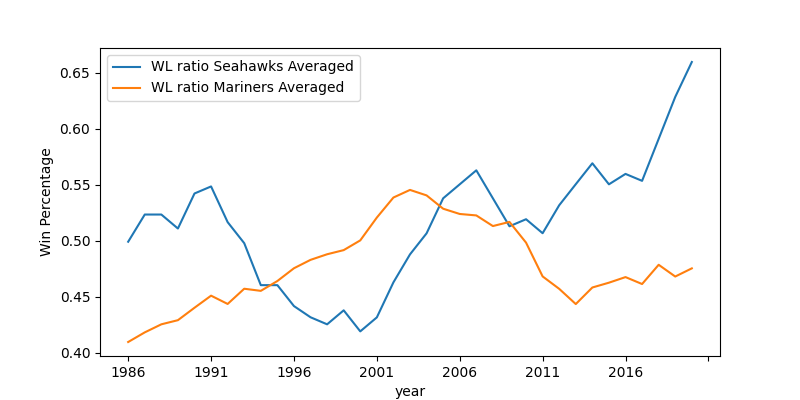

In [15]:
ax = df.plot(figsize=(8,4));
ax.set_ylabel('Win Percentage');

### Sounders FC and Storm from 2000 to 2020

In [16]:
df_new = pd.merge(df_st, df_sfc, how='outer', on=['year'])
df_new.set_index('year', inplace=True)
df_new

,WL ratio Storm Averaged,WL ratio Sounders FC Averaged
year,,
2002,0.344000,NaN
2003,0.457667,NaN
2004,0.549333,NaN
2005,0.568333,NaN
2006,0.568333,NaN
2007,0.539000,NaN
2008,0.558667,NaN
2009,0.578333,NaN
2010,0.686333,NaN


<IPython.core.display.Javascript object>


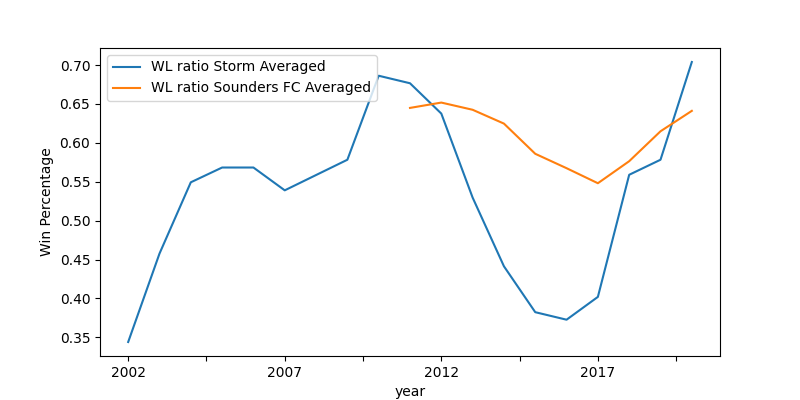

In [17]:
ax = df_new.plot(figsize=(8,4));
ax.set_ylabel('Win Percentage');